# **Simple LR**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('housing.csv')
df

#Exploratory Data Analysis (EDA):

print(df.info())

print(df.describe())

print("Missing Values: ")
print(df.isnull().sum())

#Distribution of house prices
plt.figure(figsize=(8, 5))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()


# Pairplot for exploring relationships among features
sns.pairplot(df.drop('Address', axis=1))  # Dropping 'Address' as it's not relevant for numeric analysis
plt.show()


# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.drop('Address', axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#Linear Regression:

X = df['Avg. Area Income'].values.reshape(-1, 1)
Y = df['Price'].values.reshape(-1, 1)


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

slope = model.coef_[0]
intercept = model.intercept_

print(slope)
print(intercept)

y_pred = model.predict(X_test)
print(y_pred)
print(y_pred[:5])

# Performance Metrics:

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
correlation_coefficient = np.sqrt(r_squared)

print("\nPerformance Metrics:")
print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("Correlation Coefficient:", correlation_coefficient)


plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.title('Predicted vs Actual House Prices')
plt.xlabel('Actual Price (USD)')
plt.ylabel('Predicted Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# **Multiple LR**

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Creating a DataFrame for the dataset
data = {
    'y': [2, 4, 3, 6, 5],
    'x1': [1, 2, 3, 5, 4],
    'x2': [4, 3, 2, 2, 1]
}

df = pd.DataFrame(data)
print(df)

   y  x1  x2
0  2   1   4
1  4   2   3
2  3   3   2
3  6   5   2
4  5   4   1


In [ ]:
 mat = [[0 for _ in range(len(df.columns))] for _ in range(len(df))]
 print(mat)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


In [ ]:
x1list=list(df['x1'])
x2list=list(df['x2'])
ylist=list(df['y'])
print(x1list)
print(x2list)
print(ylist)

[1, 2, 3, 5, 4]
[4, 3, 2, 2, 1]
[2, 4, 3, 6, 5]


In [ ]:
for i in range(len(df)):
 for j in range(len(df.columns)):
  if j==0:
    mat[i][j]=1
  elif j==1:
    mat[i][j]=x1list[i]
  else:
    mat[i][j]=x2list[i]
print(mat)

[[1, 1, 4], [1, 2, 3], [1, 3, 2], [1, 5, 2], [1, 4, 1]]


In [ ]:
 mat_trans = [[mat[j][i] for j in range(len(mat))] for i in range(len(mat[0]))]
 y_mat = [[0] for i in range(len(df))]
 for i in range(len(df)):
  for j in range(1):
    y_mat[i][j]=ylist[i]

In [ ]:
x=np.matmul(np.linalg.inv(np.matmul(mat_trans,mat)),np.matmul(mat_trans, y_mat))
print(x)

[[0.25]
 [1.05]
 [0.25]]


In [ ]:
while(1):
  x1= input('Enter value of x1: ')
  x2= input('Enter value of x2: ')
  y=x[0][0]+x[1][0]*int(x1)+x[2][0]*int(x2)
  print(y)

# **Multivariate**

In [ ]:
#MULTIVARIATE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('Ex2.csv')
y_mat = [[0 for _ in range(len(data.columns)-1)] for _ in range(len(data))]
y1list=list(data['y1']) #dependent
y2list=list(data['y2']) #dependent
xlist=list(data['x']) #independent
for i in range(len(data)): #create matrix of multiple y values/dependent variables
 for j in range(len(data.columns)-1):
  if j==0:
    y_mat[i][j]=y1list[i] #y1-first column
 else:
  y_mat[i][j]=y2list[i] #y2-second column
x_mat = [[0] for i in range(len(data))]
for i in range(len(data)): #to create matrix for x/independent variables
 for j in range(1):
  x_mat[i][j]=xlist[i]
xmat_trans = [[mat[j][i] for j in range(len(x_mat))] for i in range(len(x_mat[0]))] #calculate x transpose-x'
bcap=np.matmul(np.linalg.inv(np.matmul(xmat_trans,x_mat)),np.matmul(xmat_trans,y_mat)) #calculate bcap-(X'X)-1X'Y
print(bcap)
x=5
y1=bcap[0][0]*x #prediction of y1
y2=bcap[0][1]*x #prediction of y2
print(y1,y2)

# **PCA**

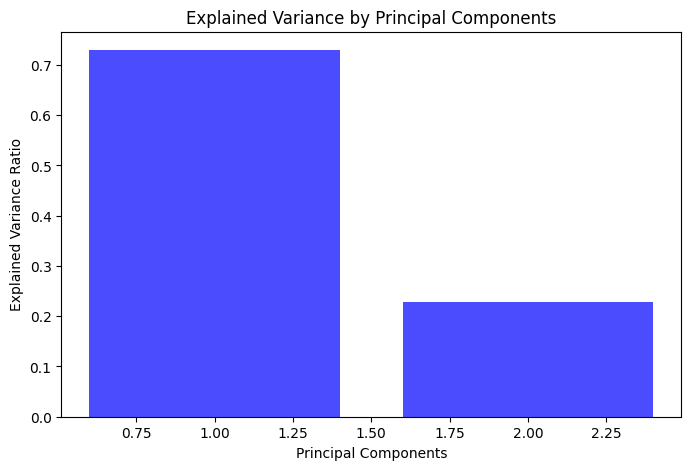

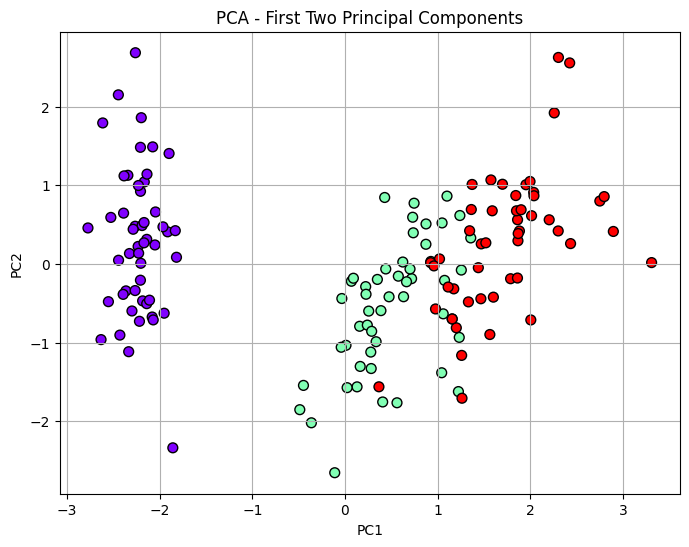

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Function to perform PCA
def perform_pca(data, num_components=None):
    # Step 2: Standardizing the data (mean=0, variance=1)
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)

    # Step 3: Apply PCA
    pca = PCA(n_components=num_components)  # If num_components=None, PCA will keep all components
    pca_result = pca.fit_transform(data_scaled)

    # Step 4: Explained variance ratio
    explained_variance = pca.explained_variance_ratio_

    return pca_result, explained_variance, pca

# Step 5: Function to plot explained variance
def plot_explained_variance(explained_variance):
    plt.figure(figsize=(8, 5))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center', color='blue')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Explained Variance by Principal Components')
    plt.show()

# Step 6: Function to visualize the first two principal components
def plot_pca_2d(pca_result, labels=None):
    plt.figure(figsize=(8, 6))

    # Plot the first two principal components
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='rainbow', edgecolor='k', s=50)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA - First Two Principal Components')
    plt.grid(True)
    plt.show()

# Example usage with any dataset
if __name__ == '__main__':
    # Generate example data (replace this with your actual dataset)
    from sklearn.datasets import load_iris
    iris = load_iris()
    data = iris.data
    labels = iris.target  # Optional: Labels for coloring the plot (useful for classification problems)

    #import pandas as pd

    # Load the CSV file into a Pandas DataFrame
    #df = pd.read_csv('your_dataset.csv')

    # Convert the DataFrame to a 2D NumPy array
    #data = df.values

    #print(data.shape)  # Shows the dimensions of the 2D array

    # Perform PCA
    num_components = 2  # Specify the number of principal components you want to keep (None for all)
    pca_result, explained_variance, pca_model = perform_pca(data, num_components)

    # Plot the explained variance
    plot_explained_variance(explained_variance)

    # Visualize the first two principal components
    plot_pca_2d(pca_result, labels)

# **SVM**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('/content/apples_and_oranges.csv')

print(df.head())

df['Class'] = df['Class'].apply(lambda x: 0 if x == 'apple' else 1)

X = df[['Weight', 'Size']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train_scaled, y_train)

y_pred = svm_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Apple', 'Orange']))


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


new_record = [[69, 4]]
new_record_scaled = scaler.transform(new_record)
new_pred = svm_classifier.predict(new_record_scaled)

print(f"Prediction for new record: {'Apple' if new_pred[0] == 0 else 'Orange'}")

# **Logistic Reg**

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


df = pd.read_csv('/content/Social_Network_Ads.csv')


print(df.head())




label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])


X = df[['Age', 'Gender']]
y = df['Purchased']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train_scaled, y_train)

def predict_purchase():
    age = float(input("Enter Age: "))
    gender = input("Enter Gender (Male/Female): ")


    gender_encoded = 1 if gender.lower() == 'male' else 0


    user_input = np.array([[age, gender_encoded]])

    user_input_scaled = scaler.transform(user_input)


    prediction = logistic_regression.predict(user_input_scaled)


    if prediction[0] == 1:
        print("Prediction: The person is likely to purchase the item.")
    else:
        print("Prediction: The person is not likely to purchase the item.")


predict_purchase()


y_prob = logistic_regression.predict_proba(X_test_scaled)[:, 1]
y_pred = logistic_regression.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_prob)
mae = mean_absolute_error(y_test, y_prob)
r2 = r2_score(y_test, y_prob)


print(f"\nMSE (Mean Squared Error): {mse:.4f}")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"R-squared (Coefficient of Determination): {r2:.4f}")


accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


# **EM**

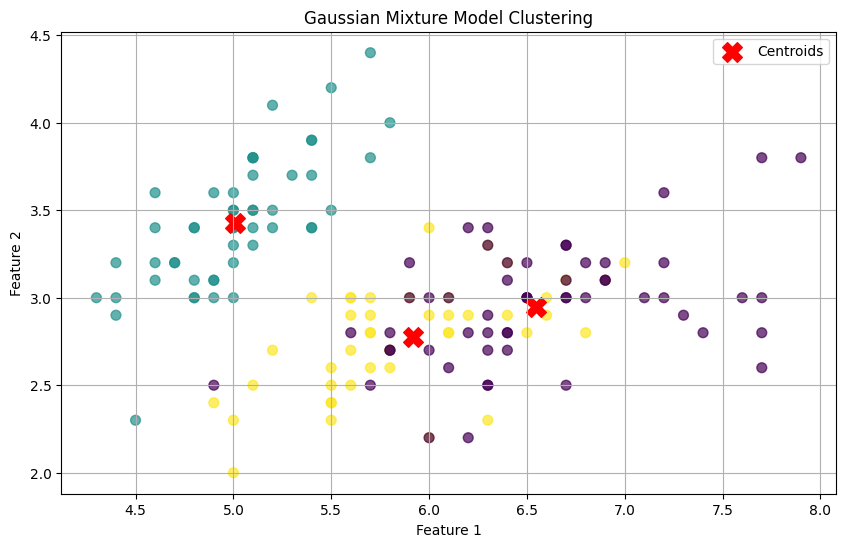

BIC: 580.8612784697606
AIC: 448.3933255295253
Silhouette Score: 0.5011761635067206


In [2]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 from sklearn import datasets
 from sklearn.mixture import GaussianMixture
 from sklearn.metrics import silhouette_score
 # Step 1: Load a sample dataset (e.g., Iris dataset)
 iris = datasets.load_iris()
 X = iris.data # Features
 y = iris.target # Actual labels (for comparison)
 # Step 2: Initialize Gaussian Mixture Model (GMM)
 n_clusters = 3 # Desired number of clusters
 gmm = GaussianMixture(n_components=n_clusters, random_state=42)
 # Step 3: Fit the model to the data
 gmm.fit(X)
 # Step 4: Predict cluster assignments
 cluster_labels = gmm.predict(X)
 # Step 5: Visualize the clusters (only for 2D visualization)
 plt.figure(figsize=(10, 6))
 plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis',
 alpha=0.7)
 plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=200,
 marker='X', label='Centroids')
 plt.title('Gaussian Mixture Model Clustering')
 plt.xlabel('Feature 1')
 plt.ylabel('Feature 2')
 plt.legend()
 plt.grid()
 plt.show()
 # Step 6: Evaluate performance metrics
 # Calculate BIC and AIC
bic = gmm.bic(X)
 aic = gmm.aic(X)
 print(f'BIC: {bic}')
 print(f'AIC: {aic}')
 # Optional: Calculate silhouette score for cluster quality
 silhouette_avg = silhouette_score(X, cluster_labels)
 print(f'Silhouette Score: {silhouette_avg}')